# Rozpoznawanie i separacja obiektów na obrazie __details.png__

## 1. Załadowanie i wyświetlenie obrazu

In [8]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2
from os import path 

In [9]:
if not path.exists('details.png'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/details.png --no-check-certificate

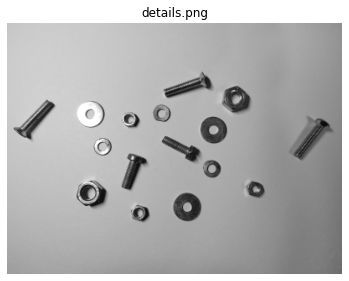

In [10]:
img = cv2.imread('details.png')
fig, ax = plt.subplots(1,1,figsize=(6,6))
_ = ax.imshow(img), ax.set_title('details.png'), ax.axis('off')

## 2. Wstępne przetwarzanie obrazu

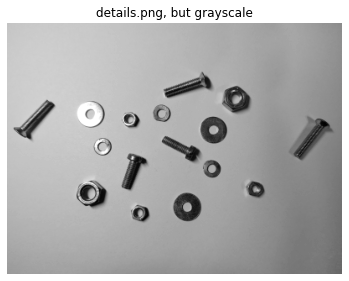

In [11]:
img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1,1,figsize=(6,6))
_ = ax.imshow(img_gs, 'gray'), ax.set_title('details.png, but grayscale'), ax.axis('off')

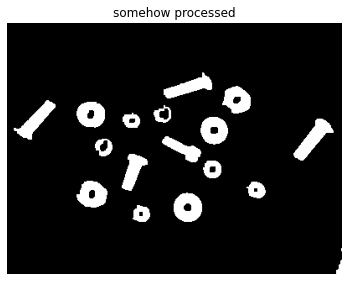

In [46]:
img_band = np.zeros_like(img_gs)
for i in range(img_gs.shape[0]):
    for j in range(img_gs.shape[1]):
        if 110 < img_gs[i,j] < 220:
            continue
        else:
            img_band[i,j] = 1
img_c = cv2.morphologyEx(img_band, cv2.MORPH_CLOSE, np.ones((5,5)))
img_c = cv2.morphologyEx(img_c, cv2.MORPH_CROSS, np.ones((2,2)))
fig, ax = plt.subplots(1,1,figsize=(6,6))
_=ax.imshow(img_c, 'gray'), ax.set_title('somehow processed'), ax.axis('off')

[ 85. 170. 170. 170. 170.  85. 170. 170. 255. 170.  85. 170. 170. 170.
 170. 255. 170.  85.  85.]


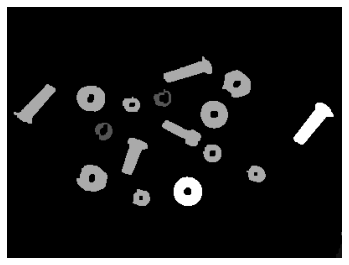

In [80]:
number_of_labels, labelled_img = cv2.connectedComponents(img_c)
moments = cv2.moments(img_c)
single_labels_imgs = []
single_moments_imgs = []

tolerance = 100
for label in range(number_of_labels-1):
    img_label = (labelled_img == label+1).astype('uint8')
    single_labels_imgs.append(img_label)
    single_moments_imgs.append(cv2.moments(img_label))
#fig, ax = plt.subplots(18, 1, figsize=(6, 6*19))
#for a in ax:
#    a.axis('off')
#for i in range(18):
#    ax[i].imshow(single_labels_imgs[i], 'gray'), ax[i].set_title('m00: {}, m01: {}'.format(single_moments_imgs[i]['m00'], single_moments_imgs[i]['m01']))
real_labels = [1 for i in range(number_of_labels)]
for i in range(number_of_labels):
    moments = single_moments_imgs[i-1]
    m0 = moments['m00']
    if m0 > 200:
        # może podkładka, może nakrętka, może śruba
        real_labels[i] += 0.5
        if m0 > 251:
            real_labels[i] += 0.5
            if m0 > 617:
                real_labels[i] += 0.5
                if m0 > 818:
                    real_labels[i] += 0.5
                    if m0 > 878:
                        real_labels[i] += 0.5
    real_labels[i] = int(real_labels[i])
real_labels = real_labels/np.max(real_labels)*255
print(real_labels)
n,m = labelled_img.shape
for i in range(n):
    for j in range(m):
        for k in range(1,number_of_labels-1):
            if labelled_img[i,j] == k:
                labelled_img[i,j] = real_labels[k]
                break

fig, ax = plt.subplots(1,1,figsize=(6,6))
_=ax.imshow(labelled_img, 'gray'), ax.axis('off')

## Wnioski
- w powyższym obrazie jasność elementu odpowiada jego etykiecie
- kilka zostało źle przypisanych, wynika to z tego, że korzystałem jedynie z pierwszego momentu
- warto byłoby to zautomatyzować, lecz nie jest to zadanie trywialne i wymaga dużo czasu